# PS 88 Project Part 2: Replication (Hall and Thompson)

**General instructions:** these replications will be similar to labs, though with a bit less guidance than we would typically give. An advantage you have is that the answer you are supposed to get for most questions is in the paper.

When we say to "replicate" a table we don't mean you need to reproduce every bit of formatting. Typically for regressions we just want you to verify that the coefficients match those reported in the table. For graphs, the output should look pretty similar, though again you don't need to make the formatting look exactly the same. 

On to the paper! The behavioral literature in American politics suggests that voters are not informed enough, and are too partisan, to be swing voters, while the institutional literature suggests that moderate candidates tend to perform better. We speak to this debate by examining the link between the ideology of congressional candidates and the turnout of their parties’ bases in US House races, 2006–2014. 

We will repoduce results from [this](https://www.cambridge.org/core/journals/american-political-science-review/article/who-punishes-extremist-nominees-candidate-ideology-and-turning-out-the-base-in-us-elections/366A518712BE9BCC1CB035BF53095D65) Hall and Thompson paper from the American Political Science Review. Specifically, we will be replicating Tables 1 and 2 and Figure 2 from the paper.

Combining a regression discontinuity design in close primary races with survey and administrative data on individual voter turnout, we will look at how extremist nominees effect their party’s share of turnout in the general election.

Run the following cell to import the libraries we will explore in this lab assignment.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: Data importing and cleaning/subsetting

First we read in the Stata dta file `rd_analysis_hs.dta` into a pandas dataframe with the name: `full`. 

`rd_analysis_hs.dta` is the main analysis dataset. It contains data on general election results and turnout by district for districts with a competitive primary.

In [2]:
#Bring in the main analysis dataset
full = pd.read_stata("data/rd_analysis_hs.dta")
full

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
0,AK,1.0,1.0,2008.0,0.777778,0.0,7.0,1.0,8.0,0.800000,...,0.0,1.0,0.391753,0.97,0.371134,0.161095,0.0,0.0,1.0,41316.0
1,AL,7.0,1.0,2006.0,0.500000,0.0,0.0,0.0,0.0,0.500000,...,0.0,6.0,0.646465,0.99,0.646465,NaN,1.0,1.0,0.0,500.0
2,AL,2.0,0.0,2008.0,0.600000,1.0,2.0,3.0,2.0,0.333333,...,0.0,2.0,0.636364,0.99,0.670000,NaN,1.0,0.0,1.0,16592.0
3,AL,5.0,1.0,2010.0,0.684211,4.0,8.0,8.0,9.0,0.125000,...,0.0,3.0,0.383838,0.99,0.383838,NaN,1.0,1.0,1.0,5000.0
4,AL,7.0,1.0,2010.0,0.652174,3.0,11.0,7.0,15.0,0.428571,...,0.0,6.0,0.727273,0.99,0.727273,NaN,1.0,1.0,1.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,WV,2.0,1.0,2006.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,319.0,0.424242,0.99,0.424242,0.513689,0.0,0.0,1.0,1000.0
454,WV,1.0,1.0,2010.0,0.900000,12.0,6.0,13.0,7.0,0.583333,...,0.0,318.0,0.424242,0.99,0.424242,0.493255,0.0,0.0,1.0,49500.0
455,WV,1.0,0.0,2010.0,0.900000,12.0,6.0,13.0,7.0,0.583333,...,0.0,318.0,0.575758,0.99,0.575758,0.377217,0.0,0.0,1.0,9250.0
456,WV,2.0,1.0,2014.0,0.368421,0.0,7.0,4.0,11.0,0.380952,...,0.0,319.0,0.387755,0.98,0.387755,0.441337,0.0,0.0,1.0,1250.0


To print out a list of all the column names and some other useful summary information, we can use the `.info()` function. (The `verbose=True` ensures that it prints all column names)

In [7]:
full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Data columns (total 151 columns):
 #    Column                          Dtype   
---   ------                          -----   
 0    state                           object  
 1    dist                            category
 2    dem                             float32 
 3    year                            float32 
 4    turnout_dem_strong              float32 
 5    low_info_votes1                 float64 
 6    high_info_votes1                float64 
 7    low_info_n1                     float64 
 8    high_info_n1                    float64 
 9    turnout_dem_nvstrong            float32 
 10   low_info_votes2                 float64 
 11   high_info_votes2                float64 
 12   low_info_n2                     float64 
 13   high_info_n2                    float64 
 14   turnout_dem_lean                float32 
 15   low_info_votes3                 float64 
 16   high_info_votes3                float64 
 

As you can see the `full` dataframe has quite a few columns. The relevant columns for the analysis are `vote_general`, `victory_general`, `turnout_party_share`, `treat`, `rv`, `rv2`, `rv3`, `rv4`, and  `rv5`.

The `rv` ("running variable") is the vote share of the more extreme of the top two candidates minus the less extreme one. `treat` is equal to 1 if the more extreme candidate wins. The column `rv2` is the column `rv` squared. `rv3` is `rv` cubed and so on.

**Question 1.1. Create a scatterplot with `rv` on the x axis and `treat` on the y axis. Explain why the graph makes sense in light of the description above.**

The paper only considers cases where we can be reasonably confident which candidate in the primary was more extreme. This is done by defining a "cutoff" equal to the median distance in estimated ideology of the top two candidates in the primary (stored as `absdist` in the data frame.)

**Question 1.2. Create a variable called `cutoff` equal to the median of  `absdist`.**


For different analyses, we will want to filter the dataframe to only contain values that are relevant for our regressions. We will always restrict attention to cases where `absdist` is greater than cutoff. Let's store those rows in a dataframe called `greater_than_cutoff` 


In [5]:
greater_than_cutoff = full[full['absdist']>=cutoff]
greater_than_cutoff

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
1,AL,7.0,1.0,2006.0,0.500000,0.0,0.0,0.0,0.0,0.500000,...,0.0,6.0,0.646465,0.990,0.646465,NaN,1.0,1.0,0.0,500.0
3,AL,5.0,1.0,2010.0,0.684211,4.0,8.0,8.0,9.0,0.125000,...,0.0,3.0,0.383838,0.990,0.383838,NaN,1.0,1.0,1.0,5000.0
5,AL,2.0,0.0,2010.0,0.600000,0.0,6.0,4.0,6.0,1.000000,...,0.0,2.0,0.636364,0.990,0.636364,NaN,1.0,1.0,1.0,250.0
9,AR,1.0,1.0,2010.0,0.777778,4.0,10.0,7.0,11.0,0.700000,...,0.0,7.0,0.391753,0.970,0.391753,0.053922,1.0,1.0,1.0,6000.0
10,AR,2.0,1.0,2010.0,0.730769,4.0,15.0,9.0,17.0,0.266667,...,0.0,9.0,0.448980,0.980,0.448980,0.056127,1.0,1.0,1.0,39400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,WI,8.0,0.0,2006.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,317.0,0.555556,0.990,0.555556,NaN,1.0,1.0,1.0,26100.0
450,WI,8.0,0.0,2010.0,0.866667,2.0,10.0,3.0,11.0,0.461538,...,0.0,317.0,0.454545,0.990,0.454545,NaN,1.0,1.0,1.0,9750.0
452,WI,6.0,0.0,2014.0,0.640000,5.0,10.0,10.0,12.0,0.333333,...,0.0,316.0,0.536906,0.989,0.536906,NaN,1.0,1.0,0.0,50850.0
454,WV,1.0,1.0,2010.0,0.900000,12.0,6.0,13.0,7.0,0.583333,...,0.0,318.0,0.424242,0.990,0.424242,0.493255,0.0,0.0,1.0,49500.0


**Question 1.3 Create a dataframe `less_than_ten` containing only values for which the absolute value of the `rv` column is less than or equal to ten percentage points.**

**Question 1.4. Create a dataframe `ten_and_cutoff` with both conditions from Questions 1.3 and 1.4.**

## Part 2. Replicating Table 1.

We will first replicate the Hall and Thompson estimates on vote share. We do this replication because our subsequent analyses will be using a smaller dataset that only includes election years since the beginning of the Cooperative Congressional Election Study (CCES) in 2006.

We will also refer back to these vote-share estimates later in interpreting the turnout estimates. Table 1 in the paper these estimates. Note we will not replicate columns 4 and 8, which use a more complicated procedure.

In the Hall and Thompson paper, TABLE 1 shows the effect of extremist mominee on party’s general-election vote share and victory for the US House from 2006–2014.

For this problem you will be creating the estimates of the effect of electing an extremist on vote share. 

In order to perform a local linear ordinary least squares (OLS) we will use the `smf.ols` function we have been working with in labs. (Revisit lab 10 if you need a refresher for the questions in this part)

**Question 2.1. To replicate the first column of table 1, run a regression with `vote_general` as the independent variable, and `treat`, `rv`, and an interaction term between `treat` and `rv` as the depedent variables, with `ten_and_cutoff` as the data frame. (note: the standard errors will not match for reasons we haven't covered, but the coefficient should match.)**

**Question 2.2. Create a graphical version of this regression, by (1) creating subsets of `ten_and_cutoff` for `rv < 0` and `rv > 0`, and then use `sns.regplot` to plot the best fit line on both sides of 0.**

<AxesSubplot:xlabel='rv', ylabel='vote_general'>

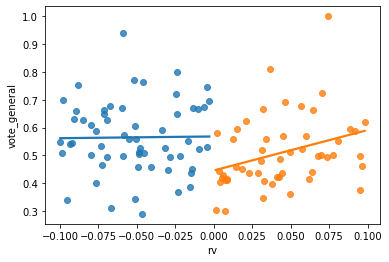

In [20]:
ten_and_cutoff_under = ten_and_cutoff[ten_and_cutoff['rv'] < 0]
ten_and_cutoff_over = ten_and_cutoff[ten_and_cutoff['rv'] > 0]
sns.regplot(x='rv', y='vote_general', data=ten_and_cutoff_under, ci=0)
sns.regplot(x='rv', y='vote_general', data=ten_and_cutoff_over, ci=0)

**Question 2.3 Now replicate the second and third columns by (1) adding the polynomial terms, and (2) using the `greater_than_cutoff` data (there is no "bandwith" here, so the authors are not restricting to cases within 10%). Note: unlike cases in class where we used interaction terms between `treat` and the running variable, there are no interaction terms in this specification.**

Note that there are a lot of "modeling choices" here: how many polynomial terms to include, whether to restrict the "bandwith" to relatively close elections, and whether to include interaction terms between the running variable (/polynomial temrs) and the treatment. 

**Question 2.4. Come up with an alternative specification of a model that varies one or more of these decisions (though keep `vote_general` as the dependent variable and `treat` as one of the independent variables). How does this affect the coefficent you get on `treat`?**

*Words for 2.4*

**Question 2.5 [Optional]. Replicate columns 5-7 of the table, which are the same as 1-3 but with `victory_general` as the independent varibale.**

What do we learn from these values and why are they important?

### 3 Effects on Partisian Turnout

Having documented the effect of extremist nominees on vote share, we now examine their effect on partisan turnout.

**Question 3.1 Repllicate the coefficients on `Extremist Nominee` in columns 1 of Table 2 by running similar regression as in 2.1 but with `turnout_party_share` as the dependent variable.**

**Question 3.2 [Optional] Replicate columns 2-3 of table 2.**

In the Hall and Thompson paper, FIGURE 2 shows the effect of extremist mominees on validated partisan turnout in the general election for the US House from 2006–2014. 

**Question 3.3. Replicate this figure by using two calls of `sns.regplot`, on for `rv < 0` and one for `rv > 0`. To do the binning, add an `x_bins = 5` argument. (The bins won't look exactly the same, but it should be broadly similar.**

<AxesSubplot:xlabel='rv', ylabel='turnout_party_share'>

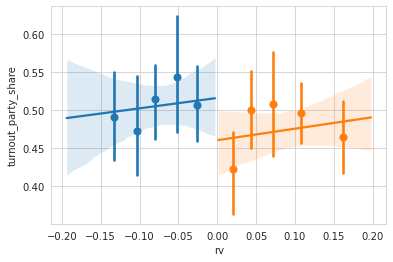

In [26]:
#Figure2: binned averages of extremist candidate's win margin in each primary (x) against general election vote share of primary winner (y)
sns.set_style("whitegrid")

sns.regplot(x="rv", y="turnout_party_share", data=twenty_and_cutoff[twenty_and_cutoff.rv<0], x_bins=5)
sns.regplot(x="rv", y="turnout_party_share", data=twenty_and_cutoff[twenty_and_cutoff.rv>=0], x_bins=5)


## Part 4. Wrapping up

**Question 4.1. What did you learn from this replication exercise? (3-4 sentences)**

**Question 4.2.  What additional data might you want to collect to build on the findings here? What would you expect to find? (4-5 sentences)**